In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv('datathon1.csv')

In [4]:
data.drop(columns=['Index'],inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hospital Name  73 non-null     object 
 1   District       73 non-null     object 
 2   Medicine Type  73 non-null     object 
 3   Till Day 1     73 non-null     int64  
 4   Whole Week     73 non-null     int64  
 5   Whole Month    72 non-null     float64
 6   Date           72 non-null     object 
 7   Week Number    72 non-null     float64
 8   Unnamed: 9     0 non-null      float64
 9   Unnamed: 10    0 non-null      float64
dtypes: float64(4), int64(2), object(4)
memory usage: 5.8+ KB


In [6]:
plt.figure(figsize=(10, 6))
plt.plot(data['Medicine Usage'])
plt.title('Medicine Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Medicine Usage')
plt.show()

KeyError: 'Medicine Usage'

<Figure size 1000x600 with 0 Axes>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hospital Name  73 non-null     object 
 1   District       73 non-null     object 
 2   Medicine Type  73 non-null     object 
 3   Till Day 1     73 non-null     int64  
 4   Whole Week     73 non-null     int64  
 5   Whole Month    72 non-null     float64
 6   Date           72 non-null     object 
 7   Week Number    72 non-null     float64
 8   Unnamed: 9     0 non-null      float64
 9   Unnamed: 10    0 non-null      float64
dtypes: float64(4), int64(2), object(4)
memory usage: 5.8+ KB


In [8]:
data.describe()

,Till Day 1,Whole Week,Whole Month,Week Number,Unnamed: 9,Unnamed: 10
count,73.000000,73.000000,72.000000,72.000000,0.0,0.0
mean,493.835616,1974.657534,19500.000000,26.333333,NaN,NaN
std,265.288785,1059.976523,10461.195903,14.927053,NaN,NaN
min,50.000000,200.000000,2000.000000,2.000000,NaN,NaN
25%,275.000000,1100.000000,10750.000000,14.250000,NaN,NaN
50%,500.000000,2000.000000,19500.000000,26.000000,NaN,NaN
75%,725.000000,2900.000000,28250.000000,38.500000,NaN,NaN
max,950.000000,3750.000000,37000.000000,51.000000,NaN,NaN


In [9]:
data=data.drop('Unnamed: 10',axis=1)

In [10]:
data.head()

,Hospital Name,District,Medicine Type,Till Day 1,Whole Week,Whole Month,Date,Week Number,Unnamed: 9
0,AMCU-PHC AAMBLI,AHMADABAD,Remdesivir,50,200,2000.0,01-01-2019,2.0,NaN
1,AMCU-PHC AMRAIWADI,AHMADABAD,Favipiravir,75,300,3000.0,01-02-2019,6.0,NaN
2,AMCU-PHC ARBUDANAGAR,AHMADABAD,Dexamethasone,100,400,4000.0,01-03-2019,10.0,NaN
3,AMCU-PHC ASARWA,AHMADABAD,Tocilizumab,125,500,5000.0,01-04-2019,15.0,NaN
4,AMCU-PHC BAGE FIRDOSH,AHMADABAD,Heparin,150,600,6000.0,01-05-2019,19.0,NaN


In [12]:
data = pd.get_dummies(data, columns=['Medicine Type'])

In [11]:
data=data.drop('Unnamed: 9',axis=1)
data.head()

,Hospital Name,District,Medicine Type,Till Day 1,Whole Week,Whole Month,Date,Week Number
0,AMCU-PHC AAMBLI,AHMADABAD,Remdesivir,50,200,2000.0,01-01-2019,2.0
1,AMCU-PHC AMRAIWADI,AHMADABAD,Favipiravir,75,300,3000.0,01-02-2019,6.0
2,AMCU-PHC ARBUDANAGAR,AHMADABAD,Dexamethasone,100,400,4000.0,01-03-2019,10.0
3,AMCU-PHC ASARWA,AHMADABAD,Tocilizumab,125,500,5000.0,01-04-2019,15.0
4,AMCU-PHC BAGE FIRDOSH,AHMADABAD,Heparin,150,600,6000.0,01-05-2019,19.0


In [13]:
data.head()

,Hospital Name,District,Till Day 1,Whole Week,Whole Month,Date,Week Number,Medicine Type_AHMADABAD,Medicine Type_Acetaminophen,Medicine Type_Albuterol,...,Medicine Type_Enoxaparin,Medicine Type_Favipiravir,Medicine Type_Heparin,Medicine Type_Immune Modulators,Medicine Type_Monoclonal Antibodies,Medicine Type_Other,Medicine Type_Remdesivir,Medicine Type_Supplemental Oxygen,Medicine Type_Tocilizumab,Medicine Type_Vitamin supplements
0,AMCU-PHC AAMBLI,AHMADABAD,50,200,2000.0,01-01-2019,2.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,AMCU-PHC AMRAIWADI,AHMADABAD,75,300,3000.0,01-02-2019,6.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,AMCU-PHC ARBUDANAGAR,AHMADABAD,100,400,4000.0,01-03-2019,10.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AMCU-PHC ASARWA,AHMADABAD,125,500,5000.0,01-04-2019,15.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,AMCU-PHC BAGE FIRDOSH,AHMADABAD,150,600,6000.0,01-05-2019,19.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, and day as numerical features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [15]:
data.head()

,Hospital Name,District,Till Day 1,Whole Week,Whole Month,Date,Week Number,Medicine Type_AHMADABAD,Medicine Type_Acetaminophen,Medicine Type_Albuterol,...,Medicine Type_Immune Modulators,Medicine Type_Monoclonal Antibodies,Medicine Type_Other,Medicine Type_Remdesivir,Medicine Type_Supplemental Oxygen,Medicine Type_Tocilizumab,Medicine Type_Vitamin supplements,Year,Month,Day
0,AMCU-PHC AAMBLI,AHMADABAD,50,200,2000.0,2019-01-01,2.0,0,0,0,...,0,0,0,1,0,0,0,2019.0,1.0,1.0
1,AMCU-PHC AMRAIWADI,AHMADABAD,75,300,3000.0,2019-01-02,6.0,0,0,0,...,0,0,0,0,0,0,0,2019.0,1.0,2.0
2,AMCU-PHC ARBUDANAGAR,AHMADABAD,100,400,4000.0,2019-01-03,10.0,0,0,0,...,0,0,0,0,0,0,0,2019.0,1.0,3.0
3,AMCU-PHC ASARWA,AHMADABAD,125,500,5000.0,2019-01-04,15.0,0,0,0,...,0,0,0,0,0,1,0,2019.0,1.0,4.0
4,AMCU-PHC BAGE FIRDOSH,AHMADABAD,150,600,6000.0,2019-01-05,19.0,0,0,0,...,0,0,0,0,0,0,0,2019.0,1.0,5.0


In [17]:
data=data.drop('Date',axis=1)

In [18]:
data

,Hospital Name,District,Till Day 1,Whole Week,Whole Month,Week Number,Medicine Type_AHMADABAD,Medicine Type_Acetaminophen,Medicine Type_Albuterol,Medicine Type_Antibiotics,...,Medicine Type_Immune Modulators,Medicine Type_Monoclonal Antibodies,Medicine Type_Other,Medicine Type_Remdesivir,Medicine Type_Supplemental Oxygen,Medicine Type_Tocilizumab,Medicine Type_Vitamin supplements,Year,Month,Day
0,AMCU-PHC AAMBLI,AHMADABAD,50,200,2000.0,2.0,0,0,0,0,...,0,0,0,1,0,0,0,2019.0,1.0,1.0
1,AMCU-PHC AMRAIWADI,AHMADABAD,75,300,3000.0,6.0,0,0,0,0,...,0,0,0,0,0,0,0,2019.0,1.0,2.0
2,AMCU-PHC ARBUDANAGAR,AHMADABAD,100,400,4000.0,10.0,0,0,0,0,...,0,0,0,0,0,0,0,2019.0,1.0,3.0
3,AMCU-PHC ASARWA,AHMADABAD,125,500,5000.0,15.0,0,0,0,0,...,0,0,0,0,0,1,0,2019.0,1.0,4.0
4,AMCU-PHC BAGE FIRDOSH,AHMADABAD,150,600,6000.0,19.0,0,0,0,0,...,0,0,0,0,0,0,0,2019.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Primary Health Centre GORRAIYA,AHMADABAD,850,3400,34000.0,38.0,0,0,0,0,...,0,0,1,0,0,0,0,2021.0,1.0,9.0
69,Primary Health Centre Hadala,AHMADABAD,875,3500,35000.0,42.0,0,0,0,0,...,0,0,1,0,0,0,0,2021.0,1.0,10.0
70,Primary Health Centre JETALPUR,AHMADABAD,900,3600,36000.0,47.0,0,0,0,0,...,0,0,1,0,0,0,0,2021.0,1.0,11.0
71,Primary Health Centre KANBHA,AHMADABAD,925,3700,37000.0,51.0,0,0,0,0,...,0,0,1,0,0,0,0,2021.0,1.0,12.0


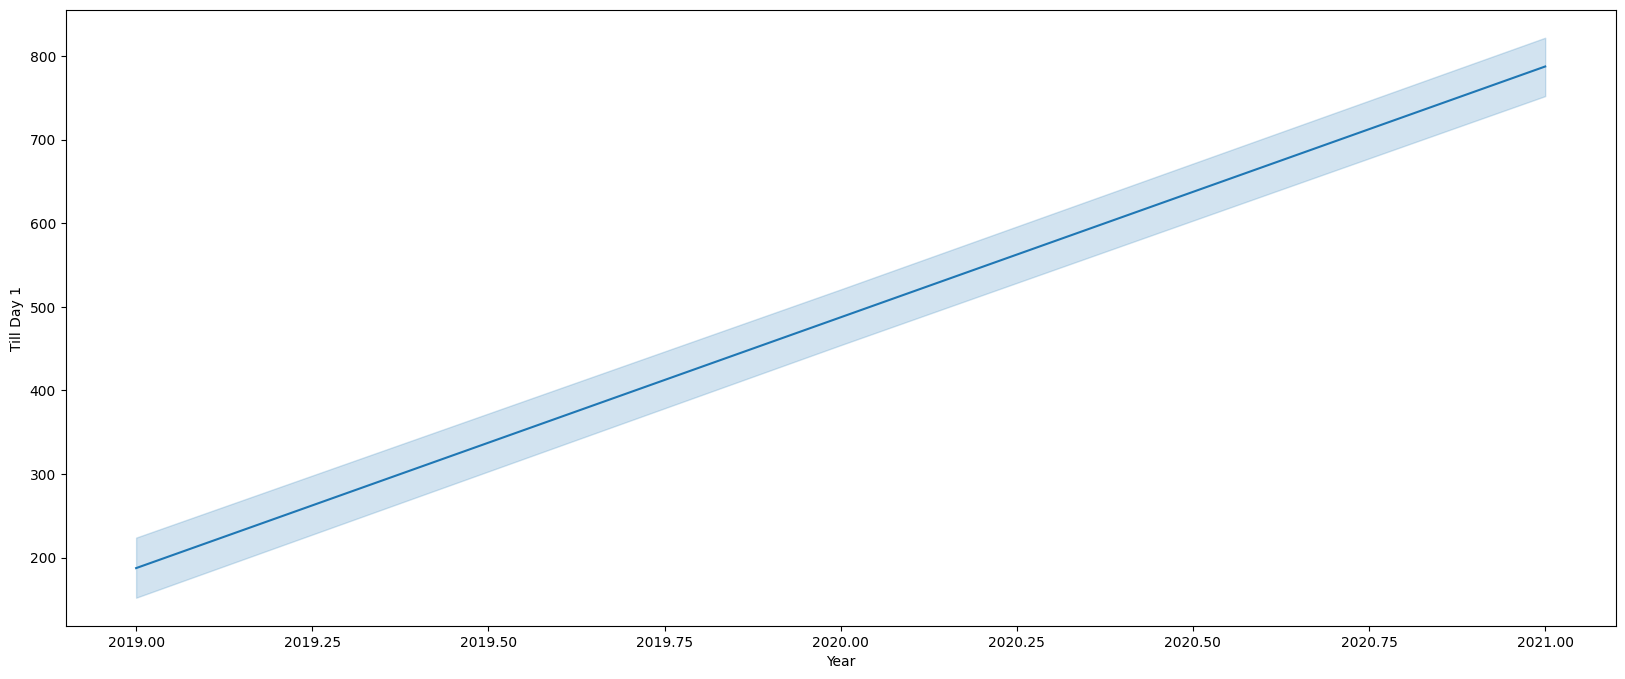

In [24]:
plt.figure(figsize=(20,8))
sns.lineplot(x=data['Year'],y=data['Till Day 1'])
plt.show()

In [19]:
decomposition = seasonal_decompose(data['Medicine Type'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.residb

KeyError: 'Medicine Type'

In [ ]:
data.describe()

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Medicine Usage'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# SARIMA model for forecasting
model = SARIMAX(data['Medicine Usage'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Predict future demands
forecast_steps = 30  # Number of steps to forecast
forecast = results.get_forecast(steps=forecast_steps)

# Plot the original data and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Medicine Usage'], label='Original')
plt.plot(forecast.index, forecast.predicted_mean, color='red', label='Forecast')
plt.fill_between(forecast.index, forecast.conf_int()['lower Medicine Usage'], forecast.conf_int()['upper Medicine Usage'], color='pink', alpha=0.3, label='Confidence Interval')
plt.legend(loc='best')
plt.title('Medicine Usage Forecast')
plt.xlabel('Date')
plt.ylabel('Medicine Usage')
plt.show()

# Calculate the Root Mean Squared Error (RMSE) to evaluate the model's performance
actual_values = data['Medicine Usage'].iloc[-forecast_steps:]
forecasted_values = forecast.predicted_mean
rmse = sqrt(mean_squared_error(actual_values, forecasted_values))
print(f'RMSE: {rmse}')